In [1]:
import scanpy as sc
sc.settings.verbosity = 0
sc.settings.set_figure_params(dpi=80, facecolor="white", frameon=False)

In [2]:
import numpy as np
import pandas as pd

In [3]:
adata = sc.read_10x_mtx(
    r'..\data\SC3pv3_GEX_Human_PBMC_filtered_feature_bc',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)  

In [4]:
adata

AnnData object with n_obs × n_vars = 5140 × 36601
    var: 'gene_ids', 'feature_types'

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [6]:
sc.pp.log1p(adata)

In [7]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [8]:
adata

AnnData object with n_obs × n_vars = 5140 × 36601
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [9]:
adata = adata[:, adata.var.highly_variable]

In [42]:
adata.layers["log_transformed"] = adata.X
adata

AnnData object with n_obs × n_vars = 5140 × 3936
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'log_transformed'

In [56]:
adata.to_df(layer="log_transformed").to_csv("./scanpy_fileter.csv")

In [114]:
import anndata 

In [116]:
adata.write("./scanpy_data.h5ad",compression='gzip')

c:\users\sansan\appdata\local\programs\python\python37\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


In [93]:
sc.pp.neighbors(adata,n_neighbors=5,n_pcs=30)
sc.tl.umap(adata)

In [94]:
sc.tl.leiden(adata)

In [95]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

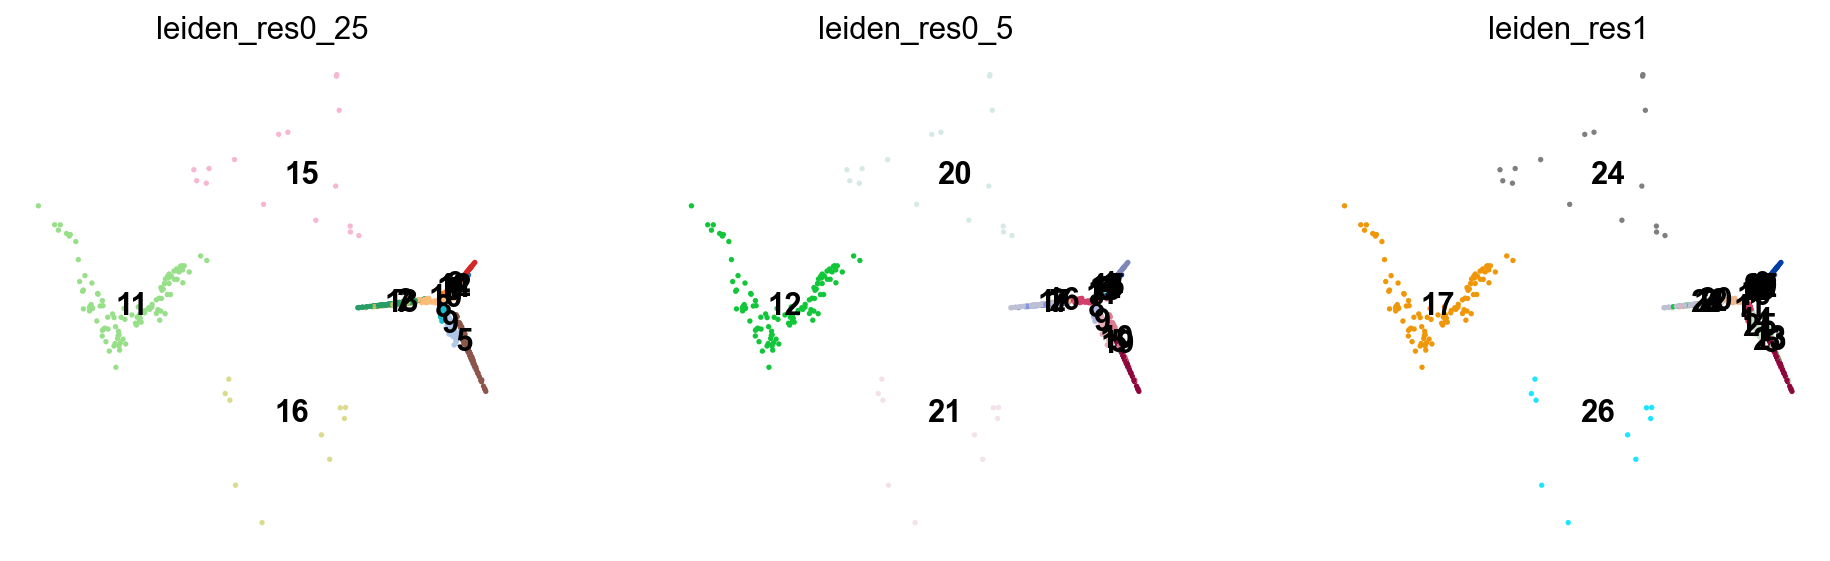

In [96]:
sc.pl.umap(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)